In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('project3_dataset.csv')

# Display my DataFrame
df.head()



,Age,Gender,RelationshipStatus,Occupation,Organization,SocialMedia,SocialMediaPlatforms,NumberofSocialMediaPlatforms,HoursSpent,Frequency,Distraction,Restlessness,Anxiety,ConcentrationDifficulty,SelfComparision,PostSentiment,ValidationSeeking,Depression,ActivityInterest Variance,Sleeplessness
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,2 to 5,5,3,2,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,More than 5,4,3,2,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",4,2 to 5,2,2,1,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",2,More than 5,3,2,1,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",3,2 to 5,4,5,4,5,5,3,3,3,4,4,1


In [2]:
# Check for missing values in each column
missing_values = df.isnull().any()

# Print columns with missing values
print(missing_values[missing_values == True])

Series([], dtype: bool)


In [3]:
# Rename columns
df = df.rename(columns={'Age ': 'Age', 'Occupation ': 'Occupation'})

# Now you can check the column names to verify the change
print(df.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness'],
      dtype='object')


In [4]:
#List all my columns 
print(df.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness'],
      dtype='object')


In [5]:
# Create a list of all unique social media platforms
all_platforms = set()
for platforms in df['SocialMediaPlatforms'].str.split(', '):
    all_platforms.update(platforms)

# Create new binary columns for each platform
for platform in all_platforms:
    df[platform] = df['SocialMediaPlatforms'].str.contains(platform).astype(int)

In [6]:
print(df.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness', 'Instagram', 'Discord', 'Twitter', 'Facebook',
       'Pinterest', 'Snapchat', 'YouTube', 'Reddit', 'TikTok'],
      dtype='object')


In [7]:
df.head()

,Age,Gender,RelationshipStatus,Occupation,Organization,SocialMedia,SocialMediaPlatforms,NumberofSocialMediaPlatforms,HoursSpent,Frequency,...,Sleeplessness,Instagram,Discord,Twitter,Facebook,Pinterest,Snapchat,YouTube,Reddit,TikTok
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,2 to 5,5,...,5,1,1,1,1,0,0,1,1,0
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,More than 5,4,...,5,1,1,1,1,0,0,1,1,0
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",4,2 to 5,2,...,5,1,0,0,1,1,0,1,0,0
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",2,More than 5,3,...,2,1,0,0,1,0,0,0,0,0
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",3,2 to 5,4,...,1,1,0,0,1,0,0,1,0,0


In [8]:
# Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Display the updated DataFrame Columns
print(df.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness', 'Instagram', 'Discord', 'Twitter', 'Facebook',
       'Pinterest', 'Snapchat', 'YouTube', 'Reddit', 'TikTok'],
      dtype='object')


In [9]:
df = df.join(pd.get_dummies(df['HoursSpent']).astype(int))

In [10]:
# Rename columns
df = df.rename(columns={'Less than 2': 'Less than 2hrs', '2 to 5': '2 to 5 hrs', 'More than 5' : 'More than 5 hrs'})

In [11]:
print(df.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness', 'Instagram', 'Discord', 'Twitter', 'Facebook',
       'Pinterest', 'Snapchat', 'YouTube', 'Reddit', 'TikTok', '2 to 5 hrs',
       'Less than 2 ', 'More than 5 '],
      dtype='object')


In [16]:
df.head()

,Age,Gender,RelationshipStatus,Occupation,Organization,SocialMedia,SocialMediaPlatforms,NumberofSocialMediaPlatforms,HoursSpent,Frequency,...,Twitter,Facebook,Pinterest,Snapchat,YouTube,Reddit,TikTok,2 to 5 hrs,Less than 2,More than 5
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,2 to 5,5,...,1,1,0,0,1,1,0,1,0,0
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,More than 5,4,...,1,1,0,0,1,1,0,0,0,1
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",4,2 to 5,2,...,0,1,1,0,1,0,0,1,0,0
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",2,More than 5,3,...,0,1,0,0,0,0,0,0,0,1
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",3,2 to 5,4,...,0,1,0,0,1,0,0,1,0,0


# ANALYSIS
## Group the data by Social Media platform and then show relationships for each platform

## FACEBOOK 

In [13]:
# Filter the original DataFrame for rows where the 'Facebook' column is 1 (indicating Facebook usage)
facebook_users = df[df['Facebook'] == 1]

# Select only the mental health-related columns along with 'Age' and 'Gender'
mental_health_columns = ['Age', 'Gender','Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness']

# Create a new DataFrame containing only the Facebook users and the selected columns
facebook_mental_health = facebook_users[mental_health_columns]

# Display the new DataFrame
facebook_mental_health.head()


,Age,Gender,Frequency,Distraction,Restlessness,Anxiety,ConcentrationDifficulty,SelfComparision,PostSentiment,ValidationSeeking,Depression,ActivityInterest Variance,Sleeplessness
0,21.0,Male,5,3,2,2,5,2,3,2,5,4,5
1,21.0,Female,4,3,2,5,4,5,1,1,5,4,5
2,21.0,Female,2,2,1,5,4,3,3,1,4,2,5
3,21.0,Female,3,2,1,5,3,5,1,2,4,3,2
4,21.0,Female,4,5,4,5,5,3,3,3,4,4,1


In [14]:
print(facebook_users.columns)

Index(['Age', 'Gender', 'RelationshipStatus', 'Occupation', 'Organization',
       'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
       'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
       'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
       'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
       'Sleeplessness', 'Instagram', 'Discord', 'Twitter', 'Facebook',
       'Pinterest', 'Snapchat', 'YouTube', 'Reddit', 'TikTok', '2 to 5 hrs',
       'Less than 2 ', 'More than 5 '],
      dtype='object')


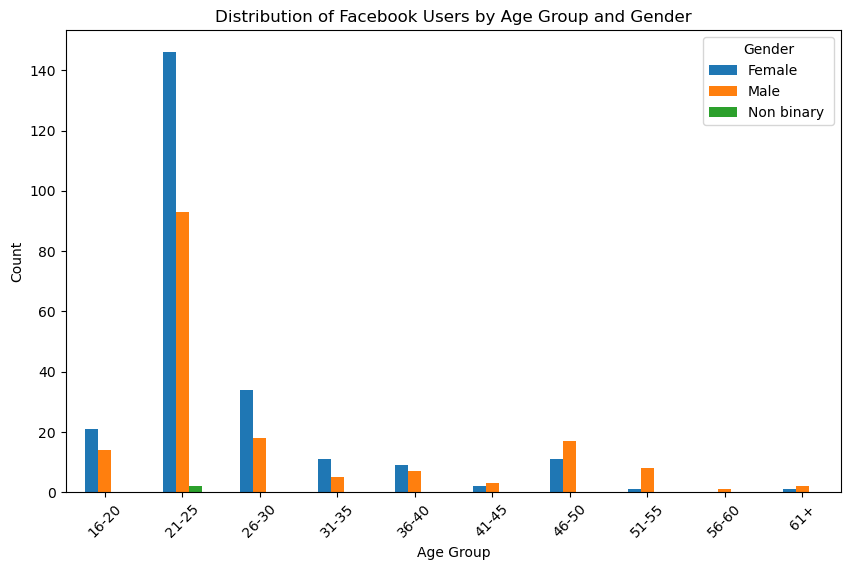

In [15]:
# Define the age categories
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, float('inf')]
age_labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61+']

# Create a copy of the dataframe to avoid the SettingWithCopyWarning
facebook_users_copy = facebook_users.copy()

# Group the Facebook users by age and gender and count the occurrences
facebook_users_copy['AgeGroup'] = pd.cut(facebook_users_copy['Age'], bins=age_bins, labels=age_labels, right=False)
age_gender_counts = facebook_users_copy.groupby(['AgeGroup', 'Gender']).size().unstack(fill_value=0)

# Plot the bar chart
age_gender_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Facebook Users by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()